In [1]:
library(Scissor)
library(stats4)
library(BiocGenerics)
library(parallel)

library("AnnotationDbi")

library("org.Hs.eg.db")
library(clusterProfiler)

载入需要的程辑包：Seurat

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

载入需要的程辑包：Matrix

Warning message:
“程辑包‘Matrix’是用R版本4.1.2 来建造的”

载入程辑包：‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


载入需要的程辑包：Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


载入需要的程辑包：IRanges



In [2]:
load('./refined_results/integrated_raw_normlized_data_20221210.RData')

In [3]:
ls()

[1] "data.input" "integrated" "labels"     "meta"       "metadata"

In [4]:
count_matrix <- read.csv('../bulk_rna_seq/sc_dataset.csv')

In [5]:
rownames(count_matrix) <- count_matrix$X

In [6]:
count_matrix <- count_matrix[,-1]

In [7]:
dim(count_matrix)

[1] 85775 14207

In [8]:
colnames(count_matrix) <- rownames(integrated@assays$RNA@counts)

In [9]:
integrated@assays$RNA@data <- as(t(count_matrix), 'dgCMatrix')

In [10]:
ls()

[1] "count_matrix" "data.input"   "integrated"   "labels"       "meta"        
[6] "metadata"

In [11]:
integrated

An object of class Seurat 
14207 features across 85775 samples within 1 assay 
Active assay: RNA (14207 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [12]:
bulk_dataset <- read.csv('../bulk_rna_seq/GSE194331_HC_PAN_PANSEP_counts.txt',sep = '\t',row.names = 1)

In [13]:
dim(bulk_dataset)

[1] 58735   119

In [14]:
gene <- bitr(rownames(bulk_dataset),fromType='ENSEMBL',toType='SYMBOL',OrgDb = 'org.Hs.eg.db')

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(bulk_dataset), fromType = "ENSEMBL", toType = "SYMBOL", :
“40.29% of input gene IDs are fail to map...”


In [15]:
bulk_dataset <- bulk_dataset[gene$ENSEMBL,]

In [16]:
counts <- aggregate(bulk_dataset, by=list(gene$SYMBOL), FUN=sum)

In [17]:
bulk_dataset <- counts

In [18]:
head(bulk_dataset)

,Group.1,HC.025,HC.027,HC.036,HC.037,HC.038,HC.039,HC.040,HC.050,HC.051,⋯,PANSEP003,PANSEP004,PANSEP005,PANSEP006,PANSEP007,PANSEP008,PANWES002,PANWES004,PANWES005,PANWES006
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A1BG,10,0,6,0,2,1,4,0,1,⋯,4,0,3,0,0,0,0,0,0,1
2,A1BG-AS1,14,4,99,36,31,23,24,22,20,⋯,23,9,9,8,53,11,13,7,15,26
3,A1CF,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,A2M,2,0,6,4,10,2,3,4,3,⋯,0,3,1,1,1,0,2,2,0,2
5,A2M-AS1,16,2,16,22,29,24,8,14,15,⋯,7,6,8,8,14,2,17,6,9,12
6,A2ML1,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [19]:
rownames(bulk_dataset) <- bulk_dataset$`Group.1`

In [20]:
bulk_dataset <- bulk_dataset[,-1]

In [21]:
head(bulk_dataset)

,HC.025,HC.027,HC.036,HC.037,HC.038,HC.039,HC.040,HC.050,HC.051,HC.054,⋯,PANSEP003,PANSEP004,PANSEP005,PANSEP006,PANSEP007,PANSEP008,PANWES002,PANWES004,PANWES005,PANWES006
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,10,0,6,0,2,1,4,0,1,4,⋯,4,0,3,0,0,0,0,0,0,1
A1BG-AS1,14,4,99,36,31,23,24,22,20,44,⋯,23,9,9,8,53,11,13,7,15,26
A1CF,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,2,0,6,4,10,2,3,4,3,3,⋯,0,3,1,1,1,0,2,2,0,2
A2M-AS1,16,2,16,22,29,24,8,14,15,25,⋯,7,6,8,8,14,2,17,6,9,12
A2ML1,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [22]:
bulk_dataset <- bulk_dataset[,33:119]

In [23]:
head(bulk_dataset)

,PANNE004,PANNE006,PANNE008,PANNE009,PANNE010,PANNE013,PANNE015,PANNE016,PANNE018,PANNE019,⋯,PANSEP003,PANSEP004,PANSEP005,PANSEP006,PANSEP007,PANSEP008,PANWES002,PANWES004,PANWES005,PANWES006
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,1,0,4,1,2,3,5,8,1,1,⋯,4,0,3,0,0,0,0,0,0,1
A1BG-AS1,17,19,20,28,30,49,76,107,27,11,⋯,23,9,9,8,53,11,13,7,15,26
A1CF,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,2,1,3,1,6,3,3,0,2,1,⋯,0,3,1,1,1,0,2,2,0,2
A2M-AS1,10,5,12,29,27,35,29,27,21,4,⋯,7,6,8,8,14,2,17,6,9,12
A2ML1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [24]:
bulk_survival <- read.csv('../bulk_rna_seq/geo.csv')

In [25]:
head(bulk_survival)

,sample,name,result
,<chr>,<chr>,<chr>
1,GSM5833563,PANNE002,Mild AP
2,GSM5833564,PANNE003,Mild AP
3,GSM5833565,PANNE004,Mild AP
4,GSM5833566,PANNE005,Moderately-severe AP
5,GSM5833567,PANNE006,Moderately-severe AP
6,GSM5833568,PANNE008,Mild AP


In [26]:
all(colnames(bulk_dataset) == bulk_survival$TCGA_patient_barcode)

[1] TRUE

In [27]:
bulk_survival$bulk_survival[which(bulk_survival$result=='Mild AP')] = 0
bulk_survival$bulk_survival[which(bulk_survival$result=='Moderately-severe AP')] = 1
bulk_survival$bulk_survival[which(bulk_survival$result=='Severe AP')] = 1

In [28]:
phenotype <- bulk_survival[,c(4)]
#colnames(phenotype) <- c("condition")
head(phenotype)

[1] 0 0 0 1 1 0

In [29]:
length(phenotype)

[1] 87

In [30]:
names(phenotype) <- bulk_survival$name

In [31]:
table(phenotype)

phenotype
 0  1 
57 30 

In [32]:
phenotype

PANNE002  PANNE003  PANNE004  PANNE005  PANNE006  PANNE008  PANNE009  PANNE010 
        0         0         0         1         1         0         0         1 
 PANNE011  PANNE013  PANNE014  PANNE015  PANNE016  PANNE017  PANNE018  PANNE019 
        1         1         0         0         0         0         0         1 
 PANNE020  PANNE021  PANNE023  PANNE024  PANNE025  PANNE026  PANNE028  PANNE029 
        0         1         0         1         0         0         0         0 
 PANNE030  PANNE031  PANNE032  PANNE033  PANNE034  PANNE035  PANNE036  PANNE038 
        1         0         0         0         0         1         0         0 
 PANNE039  PANNE040  PANNE041  PANNE042  PANNE043  PANNE044  PANNE045  PANNE047 
        0         1         0         1         0         1         0         0 
 PANNE048  PANNE049  PANNE050  PANNE051  PANNE052  PANNE053  PANNE054  PANNE055 
        0         0         1         0         0         0         0         1 
 PANNE056  PANNE057  PANNE058  PANNE059  PANNE060  PANNE062  PANNE063  PANNE064 
        0         0         0         1         0         0         0         0 
 PANNE065  PANNE066  PANNE068  PANNE069  PANNE070  PANNE071  PANNE072  PANNE073 
        0         1         0         0         0         0         0         0 
 PANNE074  PANNE075  PANNE076  PANNE077  PANNE078  PANNE079  PANNE080  PANNE081 
        0         1         1         0         0         0         0         0 
 PANNE082  PANNE085 PANSEP001 PANSEP002 PANSEP003 PANSEP004 PANSEP005 PANSEP006 
        1         1         1         1         1         1         1         1 
PANSEP007 PANSEP008 PANWES002 PANWES003 PANWES004 PANWES005 PANWES006 
        1         1         0         0         1         0         0

In [33]:
integrated <- subset(integrated,cells = rownames(integrated@meta.data[which(integrated@meta.data$condition=='sap'),]))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_harmony_ to pcaharmony_”


In [34]:
integrated

An object of class Seurat 
14207 features across 47711 samples within 1 assay 
Active assay: RNA (14207 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [35]:
seleted_cellname <- rownames(integrated@meta.data)[sample(1:47711, size = 30000)]

In [36]:
integrated <- subset(integrated,cells = seleted_cellname )

In [37]:
integrated

An object of class Seurat 
14207 features across 30000 samples within 1 assay 
Active assay: RNA (14207 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [38]:
integrated <- FindNeighbors(integrated , dims = 1:15,reduction = 'pca_harmony')

Computing nearest neighbor graph

Computing SNN



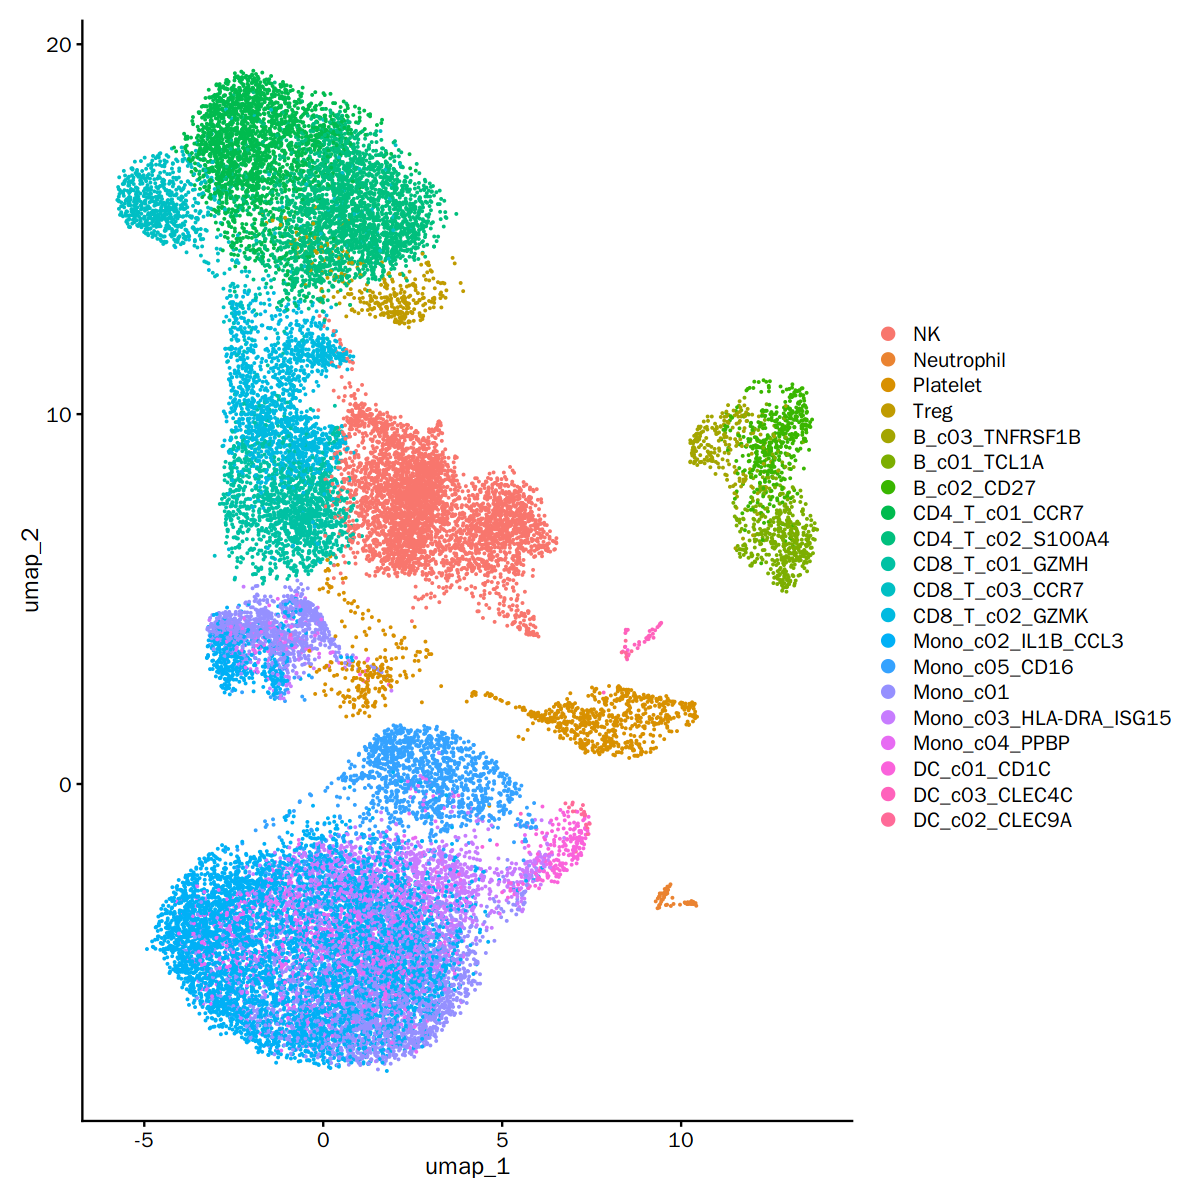

In [39]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(integrated, reduction = 'umap', label = F)

In [40]:
tag <- c('Mild', 'Severe')

In [43]:
infos1 <- Scissor_new(bulk_dataset, integrated, phenotype, tag = tag, alpha = 0.5, 
                 family = "binomial", Save_file = "./AP_condition_20230307.RData")

[1] "|**************************************************|"
[1] "Performing quality-check for the correlations"
[1] "The five-number summary of correlations:"
         0%         25%         50%         75%        100% 
0.005960783 0.069917496 0.094819369 0.132913184 0.972343005 
[1] "|**************************************************|"
[1] "Current phenotype contains 57 Mild and 30 Severe samples."
[1] "Perform logistic regression on the given phenotypes:"
[1] "alpha = 0.5"
[1] "Scissor identified 154 Scissor+ cells and 3 Scissor- cells."
[1] "The percentage of selected cell is: 0.523%"
[1] "|**************************************************|"


In [44]:
infos1

$para
$para$alpha
[1] 0.5

$para$lambda
[1] 0.004123286

$para$family
[1] "binomial"


$Coefs
    [1]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
    [6]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [11]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [16]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [21]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [26]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [31]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [36]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [41]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [46]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [51]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [56]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [61]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [66]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [71] -5.454490e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [76]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [81]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [86]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [91]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [96]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [101]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [106]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [111]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [116]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [121]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [126]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [131]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [136]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [141]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [146]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [151]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [156]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [161]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [166]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [171]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [176]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [181]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [186]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [191]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [196]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [201]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [206]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [211]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [216]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [221]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [226]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [231]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [236]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [241]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [246]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [251

In [5]:
ls()

[1] "data.input" "integrated" "labels"     "meta"       "metadata"

In [3]:
ls()

[1] "Expression_bulk" "Expression_cell" "network"         "X"              
[5] "Y"

In [42]:
Scissor_new <- function(bulk_dataset, sc_dataset, phenotype, tag = NULL,
                    alpha = NULL, cutoff = 0.2, family = c("gaussian","binomial","cox"),
                    Save_file = "Scissor_inputs.RData", Load_file = NULL){
    library(Seurat)
    library(Matrix)
    library(preprocessCore)


    if (is.null(Load_file)){
        common <- intersect(rownames(bulk_dataset), rownames(sc_dataset))
        if (length(common) == 0) {
            stop("There is no common genes between the given single-cell and bulk samples.")
        }
        if (class(sc_dataset) == "Seurat"){
            sc_exprs <- as.matrix(sc_dataset@assays$RNA@data)
            network  <- as.matrix(sc_dataset@graphs$RNA_snn)
        }else{
            sc_exprs <- as.matrix(sc_dataset)
            Seurat_tmp <- CreateSeuratObject(sc_dataset)
            Seurat_tmp <- FindVariableFeatures(Seurat_tmp, selection.method = "vst", verbose = F)
            Seurat_tmp <- ScaleData(Seurat_tmp, verbose = F)
            Seurat_tmp <- RunPCA(Seurat_tmp, features = VariableFeatures(Seurat_tmp), verbose = F)
            Seurat_tmp <- FindNeighbors(Seurat_tmp, dims = 1:10, verbose = F)
            network  <- as.matrix(Seurat_tmp@graphs$RNA_snn)
        }
        diag(network) <- 0
        network[which(network != 0)] <- 1

        dataset0 <- cbind(bulk_dataset[common,], sc_exprs[common,])         # Dataset before quantile normalization.
        dataset1 <- normalize.quantiles(as.matrix(dataset0))                           # Dataset after  quantile normalization.
        rownames(dataset1) <- rownames(dataset0)
        colnames(dataset1) <- colnames(dataset0)

        Expression_bulk <- dataset1[,1:ncol(bulk_dataset)]
        Expression_cell <- dataset1[,(ncol(bulk_dataset) + 1):ncol(dataset1)]
        X <- cor(Expression_bulk, Expression_cell)

        quality_check <- quantile(X)
        print("|**************************************************|")
        print("Performing quality-check for the correlations")
        print("The five-number summary of correlations:")
        print(quality_check)
        print("|**************************************************|")
        if (quality_check[3] < 0.01){
            warning("The median correlation between the single-cell and bulk samples is relatively low.")
        }
        if (family == "binomial"){
            Y <- as.numeric(phenotype)
            z <- table(Y)
            if (length(z) != length(tag)){
                stop("The length differs between tags and phenotypes. Please check Scissor inputs and selected regression type.")
            }else{
                print(sprintf("Current phenotype contains %d %s and %d %s samples.", z[1], tag[1], z[2], tag[2]))
                print("Perform logistic regression on the given phenotypes:")
            }
        }
        if (family == "gaussian"){
            Y <- as.numeric(phenotype)
            z <- table(Y)
            if (length(z) != length(tag)){
                stop("The length differs between tags and phenotypes. Please check Scissor inputs and selected regression type.")
            }else{
                tmp <- paste(z, tag)
                print(paste0("Current phenotype contains ", paste(tmp[1:(length(z)-1)], collapse = ", "), ", and ", tmp[length(z)], " samples."))
                print("Perform linear regression on the given phenotypes:")
            }
        }
        if (family == "cox"){
            Y <- as.matrix(phenotype)
            if (ncol(Y) != 2){
                stop("The size of survival data is wrong. Please check Scissor inputs and selected regression type.")
            }else{
                print("Perform cox regression on the given clinical outcomes:")
            }
        }
        save(X, Y, network, Expression_bulk, Expression_cell, file = Save_file)
    }else{
        load(Load_file)
    }

    if (is.null(alpha)){
        alpha <- c(0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
    }
    for (i in 1:length(alpha)){
        set.seed(123)
        fit0 <- APML1(X, Y, family = family, penalty = "Net", alpha = alpha[i], Omega = network, nlambda = 100, nfolds = min(10,nrow(X)))
        fit1 <- APML1(X, Y, family = family, penalty = "Net", alpha = alpha[i], Omega = network, lambda = fit0$lambda.min)
        if (family == "binomial"){
            Coefs <- as.numeric(fit1$Beta[2:(ncol(X)+1)])
        }else{
            Coefs <- as.numeric(fit1$Beta)
        }
        Cell1 <- colnames(X)[which(Coefs > 0)]
        Cell2 <- colnames(X)[which(Coefs < 0)]
        percentage <- (length(Cell1) + length(Cell2)) / ncol(X)
        print(sprintf("alpha = %s", alpha[i]))
        print(sprintf("Scissor identified %d Scissor+ cells and %d Scissor- cells.", length(Cell1), length(Cell2)))
        print(sprintf("The percentage of selected cell is: %s%%", formatC(percentage*100, format = 'f', digits = 3)))

        if (percentage < cutoff){
            break
        }
        cat("\n")
    }
    print("|**************************************************|")

    return(list(para = list(alpha = alpha[i], lambda = fit0$lambda.min, family = family),
                Coefs = Coefs,
                Scissor_pos = Cell1,
                Scissor_neg = Cell2))
}


In [45]:
infos1

$para
$para$alpha
[1] 0.5

$para$lambda
[1] 0.004123286

$para$family
[1] "binomial"


$Coefs
    [1]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
    [6]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [11]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [16]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [21]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [26]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [31]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [36]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [41]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [46]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [51]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [56]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [61]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [66]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [71] -5.454490e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [76]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [81]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [86]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [91]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [96]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [101]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [106]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [111]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [116]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [121]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [126]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [131]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [136]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [141]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [146]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [151]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [156]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [161]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [166]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [171]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [176]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [181]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [186]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [191]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [196]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [201]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [206]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [211]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [216]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [221]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [226]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [231]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [236]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [241]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [246]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [251

In [46]:
integrated

An object of class Seurat 
14207 features across 30000 samples within 1 assay 
Active assay: RNA (14207 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

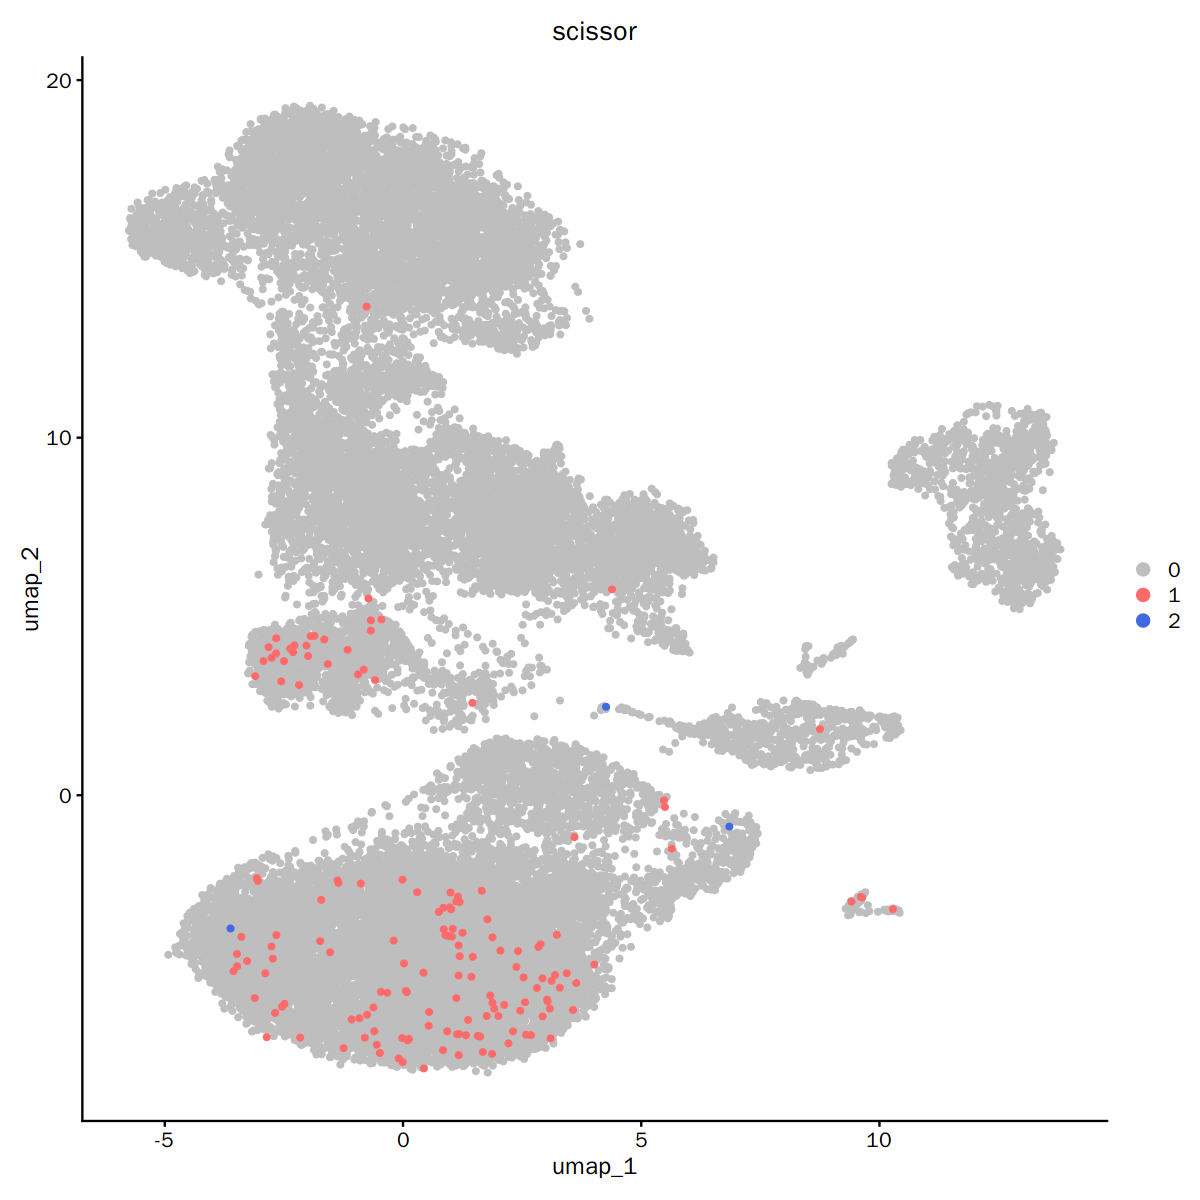

In [48]:
Scissor_select <- rep(0, ncol(integrated))
names(Scissor_select) <- colnames(integrated)
Scissor_select[infos1$Scissor_pos] <- 1
Scissor_select[infos1$Scissor_neg] <- 2
integrated <- AddMetaData(integrated, metadata = Scissor_select, col.name = "scissor")
DimPlot(integrated, reduction = 'umap', group.by = 'scissor', cols = c('grey','indianred1','royalblue'), pt.size = 1.2, order = c(2,1))

In [49]:
integrated@meta.data

,n_genes,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet,doublet_score,condition,source,leiden,refined_cluters,nCount_RNA,nFeature_RNA,scissor
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
AAGCATCCATCATTTC-1_sap1,2717,sap1,2563,11273,321,2.847512,0,5.519403e-07,sap,ours,c03_Mono_1,Mono_c02_IL1B_CCL3,2764.915,2474,0
AAACGAATCGCCTTTG-1_sap7,1984,sap7,1869,4908,174,3.545232,0,6.983810e-05,sap,ours,c05_Mono_2,Mono_c05_CD16,2865.285,1848,0
TGACGCGTCCGATGTA-1_sap3,2103,sap3,2028,4576,125,2.731643,0,3.827663e-30,sap,ours,c04_NK,NK,3083.041,1937,0
AGCGTCGGTAGCTTTG-1_sap3,1902,sap3,1838,4025,108,2.683230,0,6.025341e-20,sap,ours,c01_CD4T,CD4_T_c02_S100A4,2905.478,1757,0
AGTACTGGTGTGGACA-1_sap1,3543,sap1,3410,15887,640,4.028451,0,5.059274e-06,sap,ours,c03_Mono_1,Mono_c01,3292.347,3319,0
AGGAAATAGAGGTCAC-1_sap3,2628,sap3,2520,7513,331,4.405697,0,2.637477e-07,sap,ours,c05_Mono_2,Mono_c02_IL1B_CCL3,3061.368,2431,0
TGTAAGCGTAGGCTCC-1_sap4,1865,sap4,1785,4634,241,5.200690,0,8.168574e-09,sap,ours,c01_CD4T,CD4_T_c02_S100A4,2808.806,1705,0
TTGCATTTCTCAGAAC-1_sap7,2884,sap7,2764,6714,300,4.468275,0,1.307312e-02,sap,ours,c04_NK,NK,3510.387,2676,0
ATCACGACAGGAGGAG-1_sap1,2990,sap1,2886,14083,574,4.075836,0,6.876239e-03,sap,ours,c08_CD16,Mono_c05_CD16,2850.607,2792,0
